In [22]:
# load packages
import numpy as np 
import scipy 
import pandas as pd
import os
import matplotlib.pyplot as plt #import matplotlib as plt
from scipy.optimize import curve_fit 
import seaborn as sns #import mat73
import pickle as pkl
from datetime import datetime
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [23]:
# Main Directory of processed file from MatLab
#MainDir = 'D:\\AttnXV3_analysis\\RCA_F1\\AvgCRFs\\' # set dir
MainDir = 'C:\\plimon\\LTP_analysis\\eegMatFiles\\' # set dir
os.chdir(MainDir) # change old dir, to this dir
d = os.listdir(MainDir) # list files in dir
print(f'Files on hand: {d}')
##############################################
FileN = d[-1] # choose one                        
file_path1 = os.path.join(MainDir, FileN) # join paths and prep 2 load
print('Current WD:',file_path1) # does path exist ... ?
print('Does File #1 Exist?',os.path.exists(file_path1)) # yes or no

Files on hand: ['nl-345215-attnR_20240201_1637_RLS.mat']
Current WD: C:\plimon\LTP_analysis\eegMatFiles\nl-345215-attnR_20240201_1637_RLS.mat
Does File #1 Exist? True


In [24]:
mat_data = scipy.io.loadmat(file_path1)

In [25]:
print((mat_data.keys()))

dict_keys(['__header__', '__version__', '__globals__', 'info', 'signalData', 'noise1', 'noise2'])


In [26]:
# find basic data parms 
MainData = mat_data['signalData']
noise1 = mat_data['noise1'] # 6 x 1 
noise2 = mat_data['noise2']
inds = mat_data['info'][0][0]
ExpConds = int(MainData.shape[0])
print(f'Data file contains data for {ExpConds} different conditions')

Data file contains data for 6 different conditions


### Channels to analyze derived form ryans selcted electrodes

In [27]:
elecLeftLateral=[51,52,60,58,59,64,65,68,69]
elecLeftMedial=[72,75,81,70,71,74]
elecRightMedial=[72,75,81,76,83,82]
elecMedial=[72,75,81,70,71,74,76,83,82]
elecRightLateral=[97,92,85,96,91,95,90,94,88]

In [28]:
FreqDataPerCo = {}

for co in range(ExpConds):
    print(MainData[co][0].shape)
    FreqDataPerCo[co] = MainData[co][0]

(112, 128, 78)
(224, 128, 20)
(144, 128, 6)
(144, 128, 6)
(144, 128, 6)
(144, 128, 6)


In [29]:
co = 0 # pre and post induction ltp
HarmInd = np.array(mat_data['info'][0][0] [0][co][0])
BinInd = np.array(mat_data['info'][0][0] [1][co][0])
HarmonLabels = mat_data['info'][0][0][2][co][0]
AvgAct = mat_data['info'][0][0] [3][co] [0]
NumCondInd = mat_data['info'][0][0][4][co][0]

#########IN case some nexted arrays need to be extracted or explored
# co = 0
# ind = 3
# inds = mat_data['info'][0][0] [ind][co] [0] # avoid prelude bind which == 0 actually 
# print(inds)
# for innerlist in inds:
#     for item in innerlist:
#         print(item)

#### have to combine real and imaginar before data can be indexed 

In [30]:
NumHarms,NumHarmCount = np.unique(HarmInd, return_counts = True)
print(NumHarms,NumHarmCount)
NumBins,NumBinCount = np.unique(BinInd, return_counts = True)
print(NumBins,NumBinCount)

[1 2 3 4 5 6 7 8] [7 7 7 7 7 7 7 7]
[0 1 2 3 4 5 6] [8 8 8 8 8 8 8]


In [31]:
SortDataIn =  FreqDataPerCo[0] # 112 x 128 x 78
[NumRows, NumChans, NumTrials] = SortDataIn.shape
print(SortDataIn.shape)
real_imag_bound = int((NumRows/2))
print(real_imag_bound)


(112, 128, 78)
56


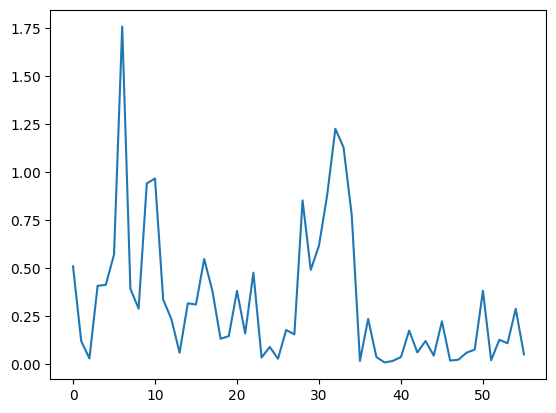

In [37]:
DataOut = np.zeros((real_imag_bound,NumChans,NumTrials))
dIn = FreqDataPerCo[0]
dIn[dIn == 0] = np.nan


for ch in range(NumChans): # numchans
    for tri in range (NumTrials): # number of trials 
        dataRow = dIn[:,ch,tri]
        DataOut[:,ch,tri] = np.hypot(dataRow[:real_imag_bound],dataRow[:real_imag_bound]) 

plt.plot(DataOut[:,100,70])

In [ ]:
# MaskPreludes = BinInd!=0
# eegData = SortDataIn[MaskPreludes :, :]
# AvgData = SortDataIn[(BinInd[BinInd == 0]),:,:]
# #omitAvg[(HarmInd[HarmInd == 1]&~BinInd == 0]),:,:]) # try and ke this matrix without the averag data inside , 112 x 128 x 
# #mysteryAvg = 

# print(AvgData.shape) # 8 x 128 x 78
# #print(eegData.shape) # 48 x 128 x 78

In [ ]:
for i in range(6):
    plt.plot(HarmInd[HarmInd == i])

In [ ]:
FreqDataPerCo = {}

for co in range(ExpConds):
    print(MainData[co][0].shape)
    FreqDataPerCo[co] = MainData[co][0]

In [ ]:
dIn = FreqDataPerCo[0]
[NumRows,NumChans,NumTrials] = (dIn.shape)
print(dIn.shape)


In [ ]:
trialdata = dIn[:,:,1] # 112 freqs real and iminary  x 128 channels
print(trialdata.shape)

TrialDataPerChan = trialdata[:,76] 
print(TrialDataPerChan.shape)

In [ ]:
plt.plot(TrialDataPerChan[:int(NumRows/2)])
plt.plot(TrialDataPerChan[int(NumRows/2):])

In [ ]:
Noise1DataPerCo = {}

for co in range(ExpConds):
    print(noise1[co][0].shape)
    Noise1DataPerCo[co] = noise1[co][0]

In [ ]:
Noise2DataPerCo = {}

for co in range(ExpConds):
    print(noise2[co][0].shape)
    Noise2DataPerCo[co] = noise2[co][0]